<p style="font-family:ComicSansMS; font-size: 30px;"> Logistic Regression with PyTorch</p>

<p style="font-family:ComicSansMS; font-size: 24px;"> Building a Logistic Regression Model with PyTorch</p>

> Steps¶

In [1]:
# Step 1: Load Dataset
# Step 2: Make Dataset Iterable
# Step 3: Create Model Class
# Step 4: Instantiate Model Class
# Step 5: Instantiate Loss Class
# Step 6: Instantiate Optimizer Class
# Step 7: Train Model

> Step 1a: Loading MNIST Train Dataset

> Inspect length of training dataset

In [2]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

train_dataset = dsets.MNIST(root='./data', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

len(train_dataset)

100%|██████████| 9.91M/9.91M [00:07<00:00, 1.40MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 217kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.26MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 2.27MB/s]


60000

> Inspecting a single image

In [3]:
train_dataset[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

> Inspecting a single data point in the training dataset

In [4]:
type(train_dataset[0])

tuple

> Inspecting training dataset first element of tuple

In [5]:
# Input Matrix
train_dataset[0][0].size()

torch.Size([1, 28, 28])

> Inspecting training dataset second element of tuple

In [6]:
# Label
train_dataset[0][1]

5

**Displaying MNIST**

> Verifying shape of MNIST image

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline  
import numpy as np

train_dataset[0][0].numpy().shape

(1, 28, 28)

> Plot image of MNIST image

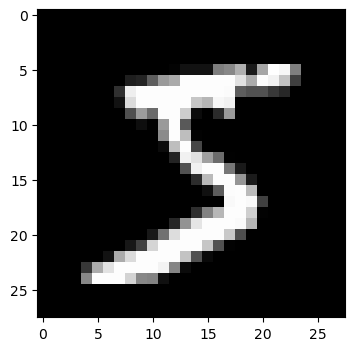

In [16]:
show_img = train_dataset[0][0].numpy().reshape(28, 28)

plt.figure(figsize=(4, 4))
plt.imshow(show_img, cmap='gray')
plt.show()

> Second element of tuple shows label

In [11]:
# Label
train_dataset[0][1]

5

> Plot second image of MNIST image

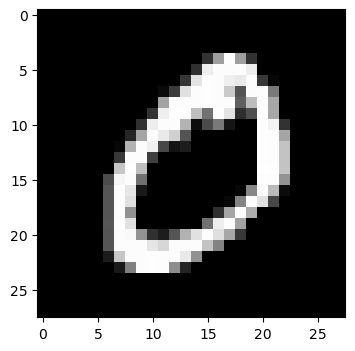

In [17]:
show_img = train_dataset[1][0].numpy().reshape(28, 28)

plt.figure(figsize=(4, 4))
plt.imshow(show_img, cmap='gray')
plt.show()

> Second element of tuple shows label

In [18]:
# Label
train_dataset[1][1]

0

> Step 1b: Loading MNIST Test Dataset

> Load test dataset

In [19]:
test_dataset = dsets.MNIST(root='./data', 
                           train=False, 
                           transform=transforms.ToTensor())

len(test_dataset)

10000

> Test dataset elements

In [20]:
type(test_dataset[0])

tuple

> Test dataset first element in tuple

In [21]:
# Image matrix
test_dataset[0][0].size()

torch.Size([1, 28, 28])

> Plot image sample from test dataset

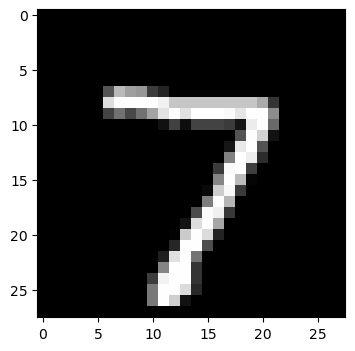

In [24]:
show_img = test_dataset[0][0].numpy().reshape(28, 28)

plt.figure(figsize=(4, 4))
plt.imshow(show_img, cmap='gray')
plt.show()

> Test dataset second element in tuple

In [25]:
# Label
test_dataset[0][1]

7

> Step 2: Make Dataset Iterable¶

> Recap training dataset

In [26]:
len(train_dataset)

60000

> Defining epochs

In [27]:
# When the model goes through the whole 60k images once, learning how to classify 0-9, it's consider 1 epoch.

# However, there's a concept of batch size where it means the model would look at 100 images 
# before updating the model's weights, thereby learning. When the model updates its weights (parameters) 
# after looking at all the images, this is considered 1 iteration.


batch_size = 100
# We arbitrarily set 3000 iterations here which means the model would update 3000 times.


n_iters = 3000
# One epoch consists of 60,000 / 100 = 600 iterations. 
# Because we would like to go through 3000 iterations, this implies we would have 3000 / 600 = 5 epochs 
# as each epoch has 600 iterations.


num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
num_epochs

5

> Create Iterable Object: Training Dataset

In [28]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

> Check Iterability

In [30]:
import collections
isinstance(train_loader, collections.abc.Iterable)

True

> Create Iterable Object: Testing Dataset

In [40]:
# Iterable object
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

> Check iterability of testing dataset

In [42]:
isinstance(test_loader, collections.abc.Iterable)

True

> Iterate through dataset

In [43]:
img_1 = np.ones((28, 28))
img_2 = np.ones((28, 28))
lst = [img_1, img_2]

# Need to iterate
# Think of numbers as the images
for i in lst:
    print(i.shape)

(28, 28)
(28, 28)


> Step 3: Building Model

> Create model class

In [44]:
# Same as linear regression! 
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        out = self.linear(x)
        return out

> Step 4: Instantiate Model Class

> Check size of dataset

In [45]:
# Size of images
train_dataset[0][0].size()

torch.Size([1, 28, 28])

> Istantiate model class based on input and out dimensions

In [46]:
# As we're trying to classify digits 0-9 a total of 10 classes, our output dimension is 10.

# And we're feeding the model with 28x28 images, hence our input dimension is 28x28.


input_dim = 28*28
output_dim = 10

model = LogisticRegressionModel(input_dim, output_dim)

> Step 5: Instantiate Loss Class

In [47]:
# Logistic Regression: Cross Entropy Loss
# Linear Regression: MSE

> Create Cross Entry Loss Class

In [48]:
criterion = nn.CrossEntropyLoss()  

> What happens in nn.CrossEntropyLoss()?

In [49]:
# It does 2 things at the same time.


# 1. Computes softmax (logistic/softmax function)
# 2. Computes cross entropy

> Step 6: Instantiate Optimizer Class¶

* parameters = parameters - learning_rate * parameters_gradients
* **At every iteration, we update our model's parameters**

> Create optimizer

In [50]:
learning_rate = 0.001

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

> Parameters In-Depth

In [51]:
#  You'll realize we have 2 sets of parameters, 10x784 which is A and 10x1 which is b in the  -->
#  equation where X is our input of size 784. -->

#   We'll go into details subsequently how these parameters interact with our input to produce our 10x1 output. -->


# Type of parameter object
print(model.parameters())

# Length of parameters
print(len(list(model.parameters())))

# FC 1 Parameters 
print(list(model.parameters())[0].size())

# FC 1 Bias Parameters
print(list(model.parameters())[1].size())

<generator object Module.parameters at 0x000002108DCE18C0>
2
torch.Size([10, 784])
torch.Size([10])


> Step 7: Train Mode

In [52]:
# Process
# Convert inputs/labels to tensors with gradients
# Clear gradient buffets
# Get output given inputs
# Get loss
# Get gradients w.r.t. parameters
# Update parameters using gradients
# parameters = parameters - learning_rate * parameters_gradients
# REPEAT

In [53]:
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Load images as Variable
        images = images.view(-1, 28*28).requires_grad_()
        labels = labels

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images)

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                # Load images to a Torch Variable
                images = images.view(-1, 28*28).requires_grad_()

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)

                # Total number of labels
                total += labels.size(0)

                # Total correct predictions
                correct += (predicted == labels).sum()

            accuracy = 100 * correct / total

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 1.8460644483566284. Accuracy: 70.2300033569336
Iteration: 1000. Loss: 1.588952898979187. Accuracy: 77.44000244140625
Iteration: 1500. Loss: 1.3307206630706787. Accuracy: 79.95999908447266
Iteration: 2000. Loss: 1.170548677444458. Accuracy: 81.43000030517578
Iteration: 2500. Loss: 1.0122350454330444. Accuracy: 82.33000183105469
Iteration: 3000. Loss: 1.075974702835083. Accuracy: 83.16000366210938


> Printing outputs of our model

In [54]:
# As we've trained our model, we can extract the accuracy calculation portion to understand 
# what's happening without re-training the model.

# This would print out the output of the model's predictions on your notebook.
iter_test = 0
for images, labels in test_loader:
    iter_test += 1
    images = images.view(-1, 28*28).requires_grad_()
    outputs = model(images)
    if iter_test == 1:
        print('OUTPUTS')
        print(outputs)
    _, predicted = torch.max(outputs.data, 1)

OUTPUTS
tensor([[-3.9065e-01, -1.4185e+00, -4.7778e-01, -1.5559e-01, -2.0090e-02,
         -4.4000e-01, -1.0299e+00,  2.8613e+00, -3.2124e-01,  8.2123e-01],
        [ 2.9404e-01, -9.4812e-02,  1.4889e+00,  9.4816e-01, -1.6315e+00,
          7.2761e-01,  1.3104e+00, -1.8209e+00,  2.4303e-01, -1.5134e+00],
        [-8.8933e-01,  2.4136e+00,  3.1521e-01,  1.3154e-01, -6.9698e-01,
         -3.3509e-01, -1.5599e-01, -2.8889e-01,  2.5825e-01, -2.4154e-01],
        [ 2.8120e+00, -2.5491e+00, -1.0284e-01, -3.3489e-01, -8.7168e-01,
          4.2231e-01,  1.1221e+00,  3.7884e-01, -5.5959e-01, -3.3561e-01],
        [ 6.4506e-02, -2.1144e+00,  3.8825e-01, -7.2359e-01,  1.8090e+00,
         -4.4858e-01,  2.7836e-01,  3.4893e-01, -3.3542e-02,  1.0255e+00],
        [-1.3254e+00,  2.9122e+00,  1.9906e-01,  1.8081e-01, -8.1286e-01,
         -4.0264e-01, -6.8161e-01, -1.2296e-01,  5.0249e-01, -1.5976e-01],
        [-1.3262e+00, -1.2161e+00, -8.1914e-01,  4.4076e-01,  1.6830e+00,
          2.7889e-01, -6

> Printing output size

In [55]:
# This produces a 100x10 matrix because each iteration has a batch size of 100 and each prediction across the 10 classes, 
# with the largest number indicating the likely number it is predicting.


iter_test = 0
for images, labels in test_loader:
    iter_test += 1
    images = images.view(-1, 28*28).requires_grad_()
    outputs = model(images)
    if iter_test == 1:
        print('OUTPUTS')
        print(outputs.size())
    _, predicted = torch.max(outputs.data, 1)

OUTPUTS
torch.Size([100, 10])


> Printing one output

In [56]:
# This would be a 1x10 matrix where the largest number is what the model thinks the image is. 
# Here we can see that in the tensor, position 7 has the largest number, indicating the model thinks the image is 7.

# number 0: -0.4181
# number 1: -1.0784
# ...
# number 7: 2.9352  


iter_test = 0
for images, labels in test_loader:
    iter_test += 1
    images = images.view(-1, 28*28).requires_grad_()
    outputs = model(images)
    if iter_test == 1:
        print('OUTPUTS')
        print(outputs[0, :])
    _, predicted = torch.max(outputs.data, 1)

OUTPUTS
tensor([-0.3907, -1.4185, -0.4778, -0.1556, -0.0201, -0.4400, -1.0299,  2.8613,
        -0.3212,  0.8212], grad_fn=<SliceBackward0>)


> Printing prediction output

In [57]:
iter_test = 0
for images, labels in test_loader:
    iter_test += 1
    images = images.view(-1, 28*28).requires_grad_()
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    if iter_test == 1:
        print('PREDICTION')
        print(predicted.size())

PREDICTION
torch.Size([100])


> Print prediction value

In [58]:
# We are printing our prediction which as verified above, should be digit 7.


iter_test = 0
for images, labels in test_loader:
    iter_test += 1
    images = images.view(-1, 28*28).requires_grad_()
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    if iter_test == 1:
        print('PREDICTION')
        print(predicted[0])

PREDICTION
tensor(7)


> Print prediction, label and label size

In [59]:
iter_test = 0
for images, labels in test_loader:
    iter_test += 1
    images = images.view(-1, 28*28).requires_grad_()
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    if iter_test == 1:
        print('PREDICTION')
        print(predicted[0])

        print('LABEL SIZE')
        print(labels.size())

        print('LABEL FOR IMAGE 0')
        print(labels[0])

PREDICTION
tensor(7)
LABEL SIZE
torch.Size([100])
LABEL FOR IMAGE 0
tensor(7)


> Print second prediction and ground truth

In [60]:
iter_test = 0
for images, labels in test_loader:
    iter_test += 1
    images = images.view(-1, 28*28).requires_grad_()
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)

    if iter_test == 1:
        print('PREDICTION')
        print(predicted[1])

        print('LABEL SIZE')
        print(labels.size())

        print('LABEL FOR IMAGE 1')
        print(labels[1])

PREDICTION
tensor(2)
LABEL SIZE
torch.Size([100])
LABEL FOR IMAGE 1
tensor(2)


> Print accuracy

In [61]:
correct = 0
total = 0
iter_test = 0
for images, labels in test_loader:
    iter_test += 1
    images = images.view(-1, 28*28).requires_grad_()
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)

    # Total number of labels
    total += labels.size(0)

    # Total correct predictions
    correct += (predicted == labels).sum()

accuracy = 100 * (correct.item() / total)

print(accuracy)

83.16


> Saving PyTorch model

In [62]:
save_model = False
if save_model is True:
    # Saves only parameters
    torch.save(model.state_dict(), 'awesome_model.pkl')

> CPU version

In [63]:
# The usual 7-step process, getting repetitive by now which we like.


import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

'''
STEP 1: LOADING DATASET
'''

train_dataset = dsets.MNIST(root='./data', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data', 
                           train=False, 
                           transform=transforms.ToTensor())

'''
STEP 2: MAKING DATASET ITERABLE
'''

batch_size = 100
n_iters = 3000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

'''
STEP 3: CREATE MODEL CLASS
'''
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        out = self.linear(x)
        return out

'''
STEP 4: INSTANTIATE MODEL CLASS
'''
input_dim = 28*28
output_dim = 10

model = LogisticRegressionModel(input_dim, output_dim)

'''
STEP 5: INSTANTIATE LOSS CLASS
'''
criterion = nn.CrossEntropyLoss()


'''
STEP 6: INSTANTIATE OPTIMIZER CLASS
'''
learning_rate = 0.001

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

'''
STEP 7: TRAIN THE MODEL
'''
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Load images as Variable
        images = images.view(-1, 28*28).requires_grad_()
        labels = labels

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        # 100 x 10
        outputs = model(images)

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                # Load images to a Torch Variable
                images = images.view(-1, 28*28).requires_grad_()

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                # 100 x 1
                _, predicted = torch.max(outputs.data, 1)

                # Total number of labels
                total += labels.size(0)

                # Total correct predictions
                correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 1.8417850732803345. Accuracy: 67.38
Iteration: 1000. Loss: 1.5717761516571045. Accuracy: 75.22
Iteration: 1500. Loss: 1.345556378364563. Accuracy: 78.68
Iteration: 2000. Loss: 1.1935166120529175. Accuracy: 80.74
Iteration: 2500. Loss: 1.1703860759735107. Accuracy: 82.02
Iteration: 3000. Loss: 0.9963839054107666. Accuracy: 82.66
